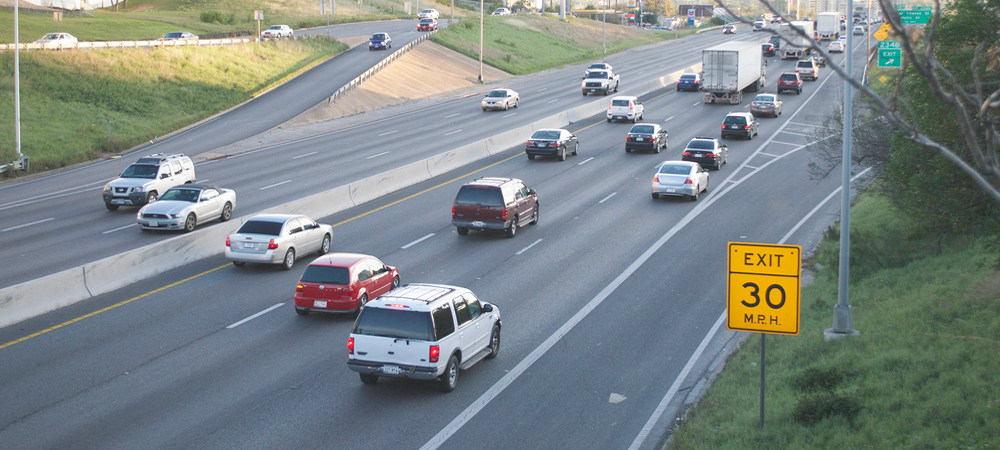

<h1 style="text-align:center">Analysis of Traffic Violations in Montgomery County Maryland</h1>

<h3 style="text-align:center"></h3>

<h2 style="text-align:center">Introduction</h2>

<font face="Verdana, Geneva, sans-serif" size="3px">There are approximately ~196 million licensed drivers in the U.S currently, and on average there are about ~41 million speeding tickets issued totaling in about ~$6 billion dollars in ticket fines each year[(Traffic Ticket Statistics)](https://jeffdavislawfirm.com/traffic-ticket-statistics/). The overall objective for this tutorial will be to focus on the traffic violations that happen specifically in Montgomery County, Maryland. Why Montgomery County? Montgomery County has some of the most heavily enforced traffic laws because it encounters all kinds of out of state drivers. Montgomery County is right on the border of DC and Maryland, so out of state drivers include D.C drivers, Virgina drivers, and in state residents as well[(Maryland Traffic)](https://maryland-criminallawyer.com/montgomery-county-criminal/traffic-lawyer/enforcement/).

<font face="Verdana, Geneva, sans-serif" size="3px">This tutorial will focus on the traffic violations happening in Montgomery County Maryland; more specifically we will be looking at the kind of citations that are being issued, when and where that are happening, the demographic, and much more. Through the information given the dataset released by Montgomery County[(Montgomery County Traffic Violations)](https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations-API/y8ms-hri9), we will look at certain trends and see if there are any correlations within the given data.

<h2 style="text-align:center">Required Libraries</h2>

<font face="Verdana, Geneva, sans-serif" size="3px">For this projected you will be needing Python 3 and these following libraries:
1. [html5lib](https://pypi.org/project/html5lib/): Used for parsing HTML
2. [sodapy](https://pypi.org/project/sodapy/): Used for accessing the dataset VIA the Socrata Open Data API(SODA)
3. [Requests](https://pypi.org/project/requests/2.7.0/): Used for making HTTP requests
4. [BeautifulSoup](https://pypi.org/project/beautifulsoup4/): Used for retrieving data from HTML and XML files
5. [Pandas](https://pandas.pydata.org/): Used for data manipulation and analysis
6. [decimal](https://docs.python.org/3/library/decimal.html): Used for floating point arithmetic
7. [matplotlib](https://matplotlib.org/): Used for plotting data onto graphs
8. [datetime](https://docs.python.org/3/library/datetime.html): Used for displaying date and time objects
9. [numpy](https://numpy.org/): Used for working with arrays, matrices, and linear algebra
10. [seaborn](https://seaborn.pydata.org/introduction.html): Used for drawing statistical graphics
11. [sklearn](https://scikit-learn.org/stable/): Used for machine learning

In [1]:
!pip3 install html5lib #1
!pip3 install sodapy #2
import requests #3
from bs4 import BeautifulSoup #4
import pandas as pd #5
from sodapy import Socrata #2
import decimal #6
import matplotlib.pyplot as plt #7
from datetime import datetime #8
import numpy as np #9
import seaborn as sns #10
from sklearn import linear_model #11
from sklearn import datasets #11

     |████████████████████████████████| 112 kB 11.4 MB/s eta 0:00:01


<h2 style="text-align:center">Collecting The Data</h2>

<font face="Verdana, Geneva, sans-serif" size="3px">The dataset where we will be getting our information from can be found [here](https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations-API/y8ms-hri9). To access this dataset, we will use the [SODA API](https://dev.socrata.com/consumers/getting-started.html) to obtain the data then we will take the data and place it into a [Pandas](https://pandas.pydata.org/docs/getting_started/index.html) Dataframe.

1. First, we need to set up a connection with the domain we are getting the data from.
2. Second, we will need specify the dataset in our request by entering the ID as well as place a limit on the amount of data that we are retrieving. The reason why we want to limit our data is because some data sets come with millions of cases and limiting the data will help us process it better as it will not use as much memory.
3. Third, we will place(in this case the first 100,000 traffic violation cases) into a Pandas Dataframe. The reason we are using Pandas Dataframe is because it will allow us to view, edit, and format to our liking.

A Pandas Dataframe is comparable to a matrix/table with rows and columns. The difference with a Pandas Dataframe and a normal table is that Pandas allows us to manipulate the dataframe however we want to. For example, the dataset we retrieved had over 1.6 million rows with over 35 columns; instead we filtered the data so that we only look at the first 100,000 rows.
You should be familiar with Pandas and its functions, start by familiarizing yourself with [this](https://pandas.pydata.org/docs/user_guide/10min.html#min).

In [2]:
client = Socrata("data.montgomerycountymd.gov", 'IXCx2ihjCYo4RF9slAVzYL2x9') #Step 1, set up connection
results = client.get("4mse-ku6q",limit=100000) #Step 2, request specific dataset limiting to the first 100,000
df = pd.DataFrame.from_records(results) #Step 3, placing into data into dataframe
df.head() #Displaying the first few rows of the dataframe.

seq_id             date_of_stop time_of_stop  \
0  140c5e16-c791-45bd-8af8-fdfb3e4af1e2  2020-12-12T00:00:00.000     22:56:00   
1  74b15fd2-3c26-4237-8a0b-7a8cdf6ac9df  2020-12-12T00:00:00.000     22:53:00   
2  c6e9d66d-1329-4f7f-840b-fc881bf34fbb  2020-12-12T00:00:00.000     22:44:00   
3  c6e9d66d-1329-4f7f-840b-fc881bf34fbb  2020-12-12T00:00:00.000     22:44:00   
4  c6e9d66d-1329-4f7f-840b-fc881bf34fbb  2020-12-12T00:00:00.000     22:44:00   

  agency                 subagency  \
0    MCP  5th District, Germantown   
1    MCP  5th District, Germantown   
2    MCP   1st District, Rockville   
3    MCP   1st District, Rockville   
4    MCP   1st District, Rockville   

                                         description  \
0  EXCEEDING POSTED MAXIMUM SPEED LIMIT: 60 MPH I...   
1         EXCEEDING THE POSTED SPEED LIMIT OF 55 MPH   
2  DRIVING, ATTEMPTING TO DRIVE MOTOR VEHICLE ON ...   
3  FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...   
4  DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...   

                    location          latitude          longitude accident  \
0  NB 27 AT SNOWDEN FARM PKY        39.2192645  -77.2385086666667       No   
1               NB 270 @ 121  39.2151866666667  -77.2773183333333       No   
2     ROCKVILLE PIKE/BOU AVE          39.05654         -77.118115       No   
3     ROCKVILLE PIKE/BOU AVE          39.05654         -77.118115       No   
4     ROCKVILLE PIKE/BOU AVE          39.05654         -77.118115       No   

   ... :@computed_region_kbsp_ykn9 :@computed_region_d7bw_bq6x  \
0  ...                          50                          36   
1  ...                          50                          44   
2  ...                          19                          60   
3  ...                          19                          60   
4  ...                          19                          60   

  :@computed_region_rbt8_3x7n search_conducted search_outcome  \
0                           1              NaN            NaN   
1                           1               No        Warning   
2                           1               No       Citation   
3                           1               No       Citation   
4                           1               No       Citation   

  search_reason_for_stop search_disposition search_reason search_type  \
0                    NaN                NaN           NaN         NaN   
1               21-801.1                NaN           NaN         NaN   
2              22-204(f)                NaN           NaN         NaN   
3              22-204(f)                NaN           NaN         NaN   
4              22-204(f)                NaN           NaN         NaN   

  search_arrest_reason  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 48 columns]

<h2 style="text-align:center">Processing The Data</h2>

<font face="Verdana, Geneva, sans-serif" size="3px"> The next step, after you have collected the data, is to process the data. The reason we want to process the data is because it will be easier to analyze after we have tidied it up to our preference. Data is often accompanied by too much information, information that is not relevant, or information is messy. Since we will be focusing on traffic violations in Montgomery County, we will start by dropping columns in the dataframe that is not needed or redundant.

<font face="Verdana, Geneva, sans-serif" size="3px"> To drop columns or rows from the Pandas dataframe we will use the [drop function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

<font face="Verdana, Geneva, sans-serif" size="3px"> Here are some [rules for tidying up data](https://cfss.uchicago.edu/notes/tidy-data/):
1. Each variable must have its own column.
2. Each observation must have its own row.
3. Each value must have its own cell.

In [3]:
#Dropping columns/rows in the dataframe via the drop function
df = df.drop(['color','vehicle_type','hazmat','work_zone','alcohol','commercial_vehicle','commercial_license','arrest_type'],axis = 1)
df = df.drop(['property_damage','model','search_outcome','search_reason_for_stop','search_conducted','contributed_to_accident'],axis = 1)
df = df.drop(['fatal','accident','belts','personal_injury','article','driver_state','dl_state',':@computed_region_vu5j_pcmz',':@computed_region_rbt8_3x7n'],axis = 1)
df = df.drop([':@computed_region_kbsp_ykn9',':@computed_region_tx5f_5em3','geolocation','seq_id','agency','latitude'], axis = 1)
df = df.drop(['longitude',':@computed_region_d7bw_bq6x','search_disposition','search_reason','search_type','search_arrest_reason'],axis = 1)

<font face="Verdana, Geneva, sans-serif" size="3px"> After dropping some unneeded rows and columns, what else can we do to tidy up our dataset?

<font face="Verdana, Geneva, sans-serif" size="3px"> It would be useful have a specific focus on within the dataset. In this case, we want to tunnel in and focus on the charges within each traffic violation. Here are some of the charge meanings:
1. 21-801 = SPEEDING CHARGE
2. 13-409 = FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER 
3. 21-112 = RECKLESS DRIVING(TEXTING WHILE DRIVING)
4. 21-201 = DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS
5. 13-411 = DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE

<font face="Verdana, Geneva, sans-serif" size="3px"> In order to focus on the charges, after dropping unneeded rows and columns, we will now tidy up and organize our given dataset based on the most frequent charges. To do so, we will begin by categorizing the charges accordingly via their given number. Some charges are accompanied by a letter after their given number, but they technically are for the same thing. For example, charge 21-801.1 and 21-801.1(b) are the same. So, we will put charges of these types together in the dataframe. Begin by taking only the first 6 numbers of the charge and place that into our newly created dataframe; we will use [regex](https://docs.python.org/3/library/re.html) to take only the first 6 numbers in the charge. Lastly, create [dictionary](https://docs.python.org/3/tutorial/datastructures.html) to hold the newly created row and append that our new dataframe.

In [4]:
dict = []
D = decimal.Decimal
for row in df.itertuples():
    charge = row[10][:6]
    #it would probably be more useful if we get the day of the date, such as monday - sunday
    #for this we will convert the string into a datetime object
    # 0 = monday, 6 = sunday
    #date = row[1][:10]
    date = datetime.strptime(row[1][5:7] +" "+ row[1][8:10] +" "+ row[1][:4], '%m %d %Y').weekday()
    #month_str = ((row[1][5:7] + '.' + row[1][2:4]))
    month = datetime.strptime(row[1][0:4] + ' ' + row[1][5:7], '%Y %m')
    #we are also going to add the time of the charge because it could be useful in out analysis
    #we are going to ignore the minuite and second and just focus on the hour it happened
    time = int(row[2][:2])
    if(charge == '21-801' or charge == '13-409' or charge == '21-201' or charge == '21-112' or charge == '13-411'):
        new_row = {'date_of_stop':date, 'time_of_stop':time, 'subagency':row[3],'description':row[4],
                  'location':row[5],'state':row[6],'year':row[7],'make':row[8],'violation_type':row[9],
                   'charge':charge,'race':row[11],'gender':row[12],'driver_city':row[13],'month':month}
        dict.append(new_row)
df_charge = pd.DataFrame.from_dict(dict)

#Display the first few rows of the dataframe
df_charge.head()

date_of_stop  time_of_stop                 subagency  \
0             5            22  5th District, Germantown   
1             5            22  5th District, Germantown   
2             5            22  5th District, Germantown   
3             5            22  5th District, Germantown   
4             5            22  5th District, Germantown   

                                         description  \
0  EXCEEDING POSTED MAXIMUM SPEED LIMIT: 60 MPH I...   
1         EXCEEDING THE POSTED SPEED LIMIT OF 55 MPH   
2  EXCEEDING POSTED MAXIMUM SPEED LIMIT: 64 MPH I...   
3  EXCEEDING POSTED MAXIMUM SPEED LIMIT: 64 MPH I...   
4         EXCEEDING THE POSTED SPEED LIMIT OF 55 MPH   

                    location state  year    make violation_type  charge  \
0  NB 27 AT SNOWDEN FARM PKY    MD  2005  NISSAN       Citation  21-801   
1               NB 270 @ 121    MD  2018   HONDA        Warning  21-801   
2        NB 270 @ RIDGE ROAD    MD  2016    JEEP       Citation  21-801   
3  NB 27 AT SNOWDEN FARM PKY    MD  2012   LEXUS       Citation  21-801   
4        NB 270 @ RIDGE ROAD    MD  2017    JEEP        Warning  21-801   

    race gender   driver_city      month  
0  WHITE      M      DAMASCUS 2020-12-01  
1  WHITE      M     ROCKVILLE 2020-12-01  
2  WHITE      M    GERMANTOWN 2020-12-01  
3  BLACK      M    CLARKSBURG 2020-12-01  
4  WHITE      F  WALKERSVILLE 2020-12-01

<font face="Verdana, Geneva, sans-serif" size="3px"> If you take a look at this new dataframe compared to the original one that we got from the Montgomery County website, it looks a lot more clean and readable. Our new dataframe, tells us exactly everything that we want pertaining to the charges and the dataframe is sorted by charges as well. The most important takeaway from this section is that you tidy and organize your data according to your preference, in a way that will give you the easiest as well as quickest lookup.

<h2 style="text-align:center">Data Analysis And Visualization</h2>

<font face="Verdana, Geneva, sans-serif" size="3px"> In this step, now that we have a dataframe that is organized and tidy, we will now begin our analysis of the charges. We will use the [matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html) library that we imported earlier in the required libraries section. 

<h3>Charge Counts by Gender</h3>

<font face="Verdana, Geneva, sans-serif" size="3px"> First, let us do a broad analysis of the charge counts by gender. We would like to know whether or not the amount of traffic violations are caused by any specific gender. This is just an example, and you can visualize your data in any way that fits your requirements.

(array([68488.,     0.,     0.,     0.,     0., 31228.,     0.,     0.,
            0.,   284.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

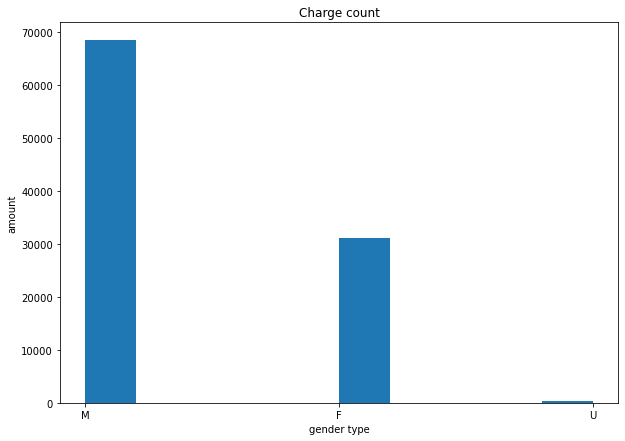

In [5]:
#We will visualize the charge counts by creating a histogram
plt.figure(figsize=(10,7))
plt.title('Charge count') 
plt.xlabel("gender type") 
plt.ylabel("amount") 
plt.hist(df['gender'])

<font face="Verdana, Geneva, sans-serif" size="3px"> With this histogram visualization, we can see that in the 100,000 cases that we took from the Montgomery County dataset; the male gender has twice as much traffic violation charges than females and unknown combined. With this histogram, you can almost conclude that males are twice as more likely to recieve a traffic violation than the other respective genders. But because, we are sampling only the first 100,000 charges; we cannot be 100% conclusive in our statement that men are guaranteed more likely to be charged than the other genders. The reason is because you cannot conclude a portion of the data with the entire data; there is a chance that females and unknown rise above males in traffic violations later in the dataset. You can read more about data sampling [here](https://www.pqsystems.com/qualityadvisor/DataCollectionTools/sampling.php).

<h3>Charge Counts vs Warnings vs ESERO(Electric Safety Equipment Repair Order)</h3>

<font face="Verdana, Geneva, sans-serif" size="3px"> Next, lets visualize the traffic violations based on their actual charge since not all traffic violations resulted in an actual charge. Many traffic violations that are committed often have a few different results; the driver is issued a citation, a warning, or an ESERO(the driver being issued a repair order for their car not being up to standards).

(array([41162.,     0.,     0.,     0.,     0., 55659.,     0.,     0.,
            0.,  3179.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

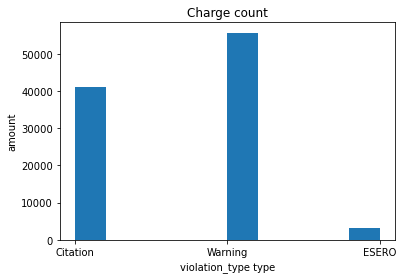

In [6]:
#We will visualize what the traffic violation resulted in by creating a histogram
plt.title('Charge count') 
plt.xlabel("violation_type type") 
plt.ylabel("amount") 
plt.hist(df['violation_type'])

<font face="Verdana, Geneva, sans-serif" size="3px"> With this visualization using the matplotlib histogram, we can see that many of the traffic violation offenders were issued a warning and many of them were issued an actual citation. Compared to citations given and warnings given, there were only a handful of repair orders given due to faulty vehicle parts. It is also important to note that since we only sampled the first 100,000 charges, we cannot completely conclude that most traffic violations result in warnings.

<h3>Charge Counts by Vehicle State</h3>

<font face="Verdana, Geneva, sans-serif" size="3px"> Let us do another histogram visualization, but this time let us look at the  charges based on the vehicle's license plate state it was issued from. Since Montgomery County, is a hotspot know for welcoming drivers from the DMV(D.C, Maryland, Virgina) area; we will look at whether or not the majority of charges in Montgomery County are from instate or from out of state.

(array([9.5358e+04, 2.0600e+03, 6.1400e+02, 9.3200e+02, 3.9500e+02,
        3.4400e+02, 1.1800e+02, 8.4000e+01, 8.4000e+01, 1.1000e+01]),
 array([ 0. ,  5.6, 11.2, 16.8, 22.4, 28. , 33.6, 39.2, 44.8, 50.4, 56. ]),
 <a list of 10 Patch objects>)

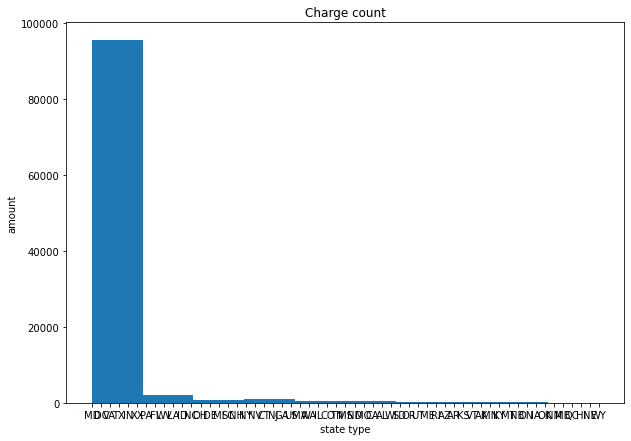

In [7]:
#We will visualize the charges by looking at the vehicles license plate state issue
plt.figure(figsize=(10,7))
plt.title('Charge count') 
plt.xlabel("state type") 
plt.ylabel("amount") 
plt.hist(df['state'])

<font face="Verdana, Geneva, sans-serif" size="3px"> This histogram shows us that a vast majority of traffic violations were caused by in state residents, even though there are many out of state drivers that come through the area. Even though we sample the data(first 100,000 charges), it would be safe to say that a majority of the traffic violations come from in state residents. We can assume this because the difference is just so massive, out of 100,000 charges almost greater than 90% are from in state resident drivers.

<h3>Type of Charges</h3>

<font face="Verdana, Geneva, sans-serif" size="3px"> After looking at a variety of different vehicle and driver related information via visualization, lets go a bit more in depth and look at the distribution by charge types. Recall that the charge types can be described as:
1. 21-801 = SPEEDING CHARGE
2. 13-409 = FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER 
3. 21-112 = RECKLESS DRIVING(TEXTING WHILE DRIVING)
4. 21-201 = DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS
5. 13-411 = DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE

(array([18670.,     0.,  6491.,     0.,     0.,  8575.,     0.,  3919.,
            0.,  2878.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

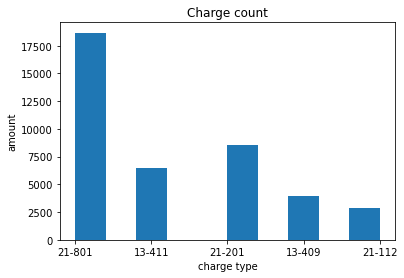

In [8]:
#We will visualize the charge type frequencies
plt.title('Charge count') 
plt.xlabel("charge type") 
plt.ylabel("amount") 
plt.hist(df_charge['charge'])

<font face="Verdana, Geneva, sans-serif" size="3px"> The histogram visualization allow us to see that the leading charge type is due to speeding, while the next most frequent charge type is due to drivers failing to obey traffic control device instructions. When we compare this to the last couple of visualizations, we can almost assume accurately that a majority of male drivers are in state residents whom get tickets due to speeding. This is one of the ways we can use matplotlib to analyze and visualize our data set to view trends.

<h3>Charges On Days Of The Weeks</h3>

<font face="Verdana, Geneva, sans-serif" size="3px"> Let us look at the days of the weeks where the charges are happening so that we can try to see if there is a common trend going on. There are many questions that can be asked when working with sets of data, for example are there days where traffic violations occur more often? If so, why do you think these happen on specific days of the week? Try to ask questions on your data and find the answer to it by visualizing with the given libraries.

<font face="Verdana, Geneva, sans-serif" size="3px"> Due to how we formatted our rows and columns in the process of tidying up our dataframe, please refer to the days of the weeks as such:
    
0. Monday
1. Tuesday
2. Wednesday
3. Thursday
4. Friday
5. Saturday
6. Sunday

(array([5274., 7425.,    0., 7200.,    0., 6887., 6351.,    0., 3938.,
        3458.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

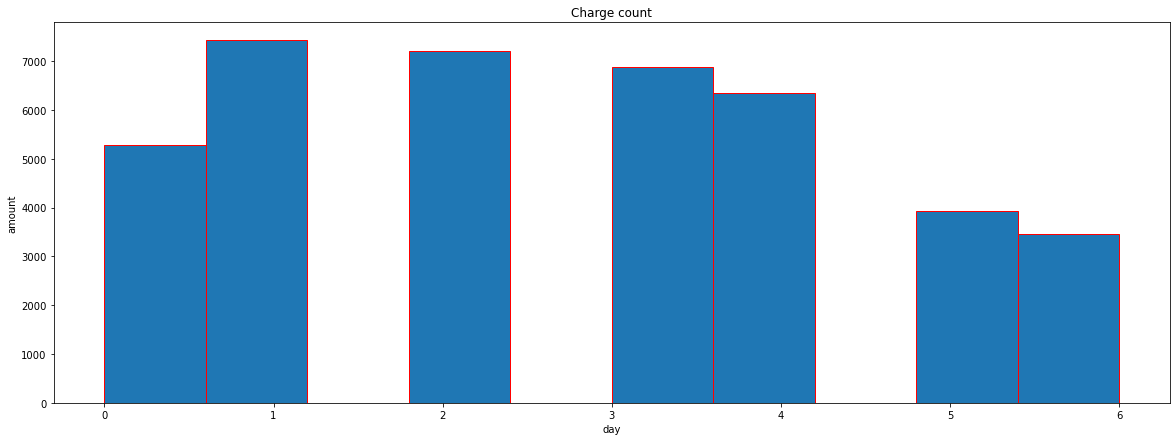

In [9]:
#We will visualize the charge frequencies based on the days of the weeks
plt.figure(figsize=(20,7))
plt.title('Charge count') 
plt.xlabel("day") 
plt.ylabel("amount") 
plt.hist(df_charge['date_of_stop'],align='mid',edgecolor='red')

<font face="Verdana, Geneva, sans-serif" size="3px"> Looking at our histogram, we can see that charges are about evenly spread out amongst the days of the weeks. One minor detail that we can see is that most of the charges are happening during the middle of the week(Tues-Fri), while there is not as many traffic violations happening on (Sat-Mon). Is there any trend we can assume with such information? Is it possible that there is a higher chance of traffic violations occcuring because of it being a business day? 

<h3>Charges On Times During The Day</h3>

<font face="Verdana, Geneva, sans-serif" size="3px"> Let us try to be even more specific, since we just looked at the charges based on the days of the week. Lets see if we can find a trend and visualize the charges based on the time during the days of the weeks. For this, we will make a different kind of visualization method; for this we will use a scatter plot rather than a histogram.

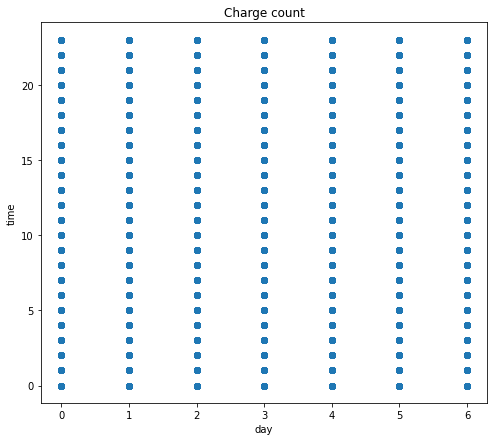

In [10]:
#We will visualize the charge frequencies based on the time during the days of the weeks
plt.figure(figsize=(8,7))
plt.title('Charge count') 
plt.xlabel("day") 
plt.ylabel("time") 
plt.scatter(df_charge['date_of_stop'],df_charge['time_of_stop'])
plt.show()

<font face="Verdana, Geneva, sans-serif" size="3px"> How do you think this visualization scatter plot looks? Not very good right? Sometimes when analyzing data and building visualization plots, you will get plots that tell you nothing or does not look good at all. So instead, we will have to try a different approach; our new approach will be a [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html). The violin plot will help us a lot more than the scatter plot since it can tell us about the distribution and density during times.

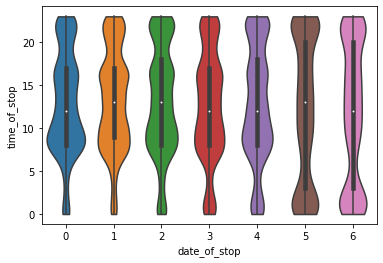

In [11]:
#We will visualize the charge frequencies based on the time during the days of the weeks
sns.violinplot(x = df_charge['date_of_stop'], y= df_charge['time_of_stop'],cut=0)

<font face="Verdana, Geneva, sans-serif" size="3px"> Looking at this, it seems that from the days 0-4(Monday to Friday) a lot of people have traffic violations from around 9am to 3pm. What could this mean? We can make an informed guess and say that a lot of these traffic violations are occuring on business days during work hours. It could mean that people are causing traffic violations for either being late to work or rushing to get home. While on the weekends(days 5 and 6), there seems to have the most of their traffic violations around 12am.

<h3>Charge Frequencies Based On Months</h3>

<font face="Verdana, Geneva, sans-serif" size="3px"> We will do one more visualization so that we cover all basis and trends based on our data set. For this visualization, we will plot the charge frequencies and see how many traffic violations happen in a given month. 

(array([2441., 5344., 4363., 5461., 9618.,    0., 2524.,    0., 1693.,
           0., 1002., 1733., 1946., 4408.]),
 array([737333. , 737363.5, 737394. , 737424.5, 737455. , 737485.5,
        737516. , 737546.5, 737577. , 737607.5, 737638. , 737668.5,
        737699. , 737729.5, 737760. ]),
 <a list of 14 Patch objects>)

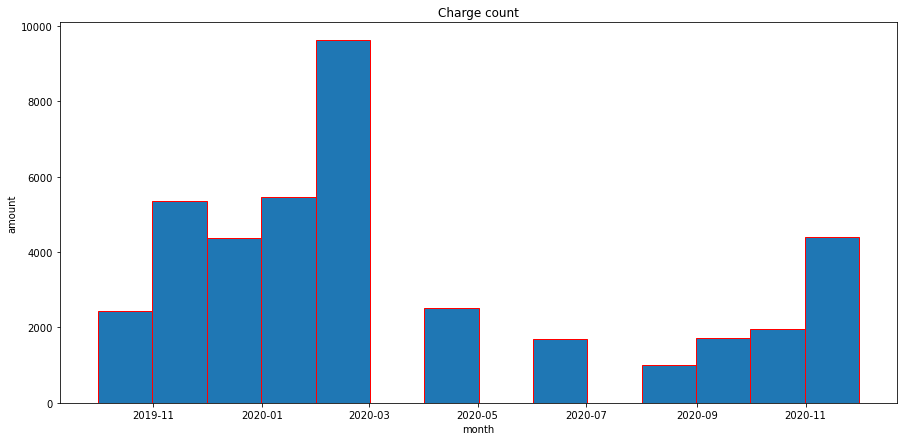

In [12]:
#We will visualize the charge frequencies based on the number of traffic violations that happen for a given month.
plt.figure(figsize=(15,7))
plt.title('Charge count') 
plt.xlabel("month") 
plt.ylabel("amount") 
plt.hist((df_charge['month']),align='mid',edgecolor='red',bins = 14)

<font face="Verdana, Geneva, sans-serif" size="3px"> With this histogram, we can see that there is a large decrease in traffic violations starting at the beginning of 2020. Then it begins to increase again around November of that year. The reason for this is probably due to the ongoing COVID 19 pandemic which hindered a lot of people from going outside or driving at all. This is one of the ways that we can connect our data to ongoing things happening around us. With all of these visualizations and different kinds of plots, we are able to see many different trends and correlations.

<h2 style="text-align:center">Hypothesis Testing And Machine Learning To Provide Analysis</h2>

<font face="Verdana, Geneva, sans-serif" size="3px"> For this section, we will test the amount of traffic voilations per month and try to predict the next month. How this will work is that we will take the data that we already have so far, and then try to estimate what it will look like for the next month. The variables that we will use to create our linear regression will be the number of traffic violations that happen in a given month, so the month and the traffic violation count. You should familiar yourself with linear regression using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

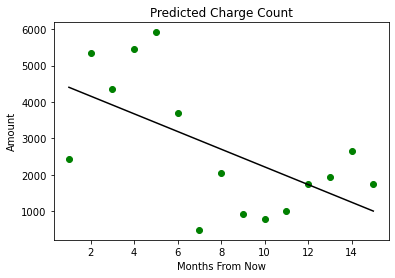

In [13]:
#cant make a scatter plot for arrays of diff length(plt.scatter(df_charge['month'],max_count))
#so we make a list of the unique months and the amount of charges for that uniqie month
df_charge = df_charge.sort_values(by=['month'])
max_count = []
month_lst = []
curr = df_charge['month'][0]
month_count = 1
#we are going to use linear_model.LinearRegression(), but it cant take in time objects when i want to use the reg.fit so we are going 
#to just keep track of the month by incrementing it by 1
month_lst.append(month_count)
count = 0
for row in df_charge.itertuples():
    if(curr == row[14]):
        count = count + 1
    else:
        max_count.append(count)
        count = 0
        curr = row[14]
        month_lst.append(month_count)
        month_count = month_count + 1
max_count.append(count)
#both the start of the list is 0 so we can just remove the first index
max_count = max_count[1:]
month_lst = month_lst[1:]
reg = linear_model.LinearRegression()
monthArr = np.array([[y] for y in month_lst])
countArr = np.array([[l] for l in max_count])
reg.fit(monthArr,countArr)
#plt.scatter(month_lst,max_count)
plt.scatter(monthArr,countArr,color = 'g')
plt.title('Predicted Charge Count') 
plt.ylabel("Amount") 
plt.xlabel("Months From Now") 
plt.plot(monthArr,reg.predict(monthArr),color = 'k')

<font face="Verdana, Geneva, sans-serif" size="3px"> Based off of our current data, we can see that the predicted charge count from now will follow a downward trend if the cases continue to decrease as it is. Now is this completely accurate? No, because if we were to predict the 17th month from today; we would get a negative number of cases which is impossible. So what factors might be causing our linear regression prediction to be inaccurate? It seems that COVID 19 might have a play into the inaccuracy of the prediction because there is a sudden dramatic decrease in traffic violation charges happening, this caused the prediction to have an unstable decreasing trend. 

<font face="Verdana, Geneva, sans-serif" size="3px"> How can we get a better and more accurate prediction? We will need to find some better variables. So, intead of the two variables month and violation count; we should change our variables to year and violation count. This way, instead of prediction months into the future; we will predict a few years into the future and hopefully that trend will be much more accurate.

In [14]:
print("Everytime a month goes by, the expected number of traffic violations decreases by ", reg.coef_)

Everytime a month goes by, the expected number of traffic violations decreases by  [[-243.21428571]]


In [15]:
print("At the 15th month, you can see that we expect the amount of traffic violations to be ", reg.predict([[15]]))

At the 15th month, you can see that we expect the amount of traffic violations to be  [[998.7]]


In [16]:
print("This shows that there is not a big dependence with a score of ",reg.score(monthArr, countArr))

This shows that there is not a big dependence with a score of  0.35752611296146464


<h2 style="text-align:center">Conclusion</h2>

<font face="Verdana, Geneva, sans-serif" size="3px"> There are many things to learn from traffic violations from the number of violators, to the demographic of the violators, the time of violations, location of violations, and much more. We could learn so many things from just looking at Montgomery County traffic violations alone, it just goes to show how powerful data analysis can be and how useful it is.

<font face="Verdana, Geneva, sans-serif" size="3px"> From our analysis and observations alone we could see that in Montgomery County:
1. Male commit more traffic violations than other genders
2. Most traffic violations result in only warnings
3. A vast majority of the traffic violator vehicles are from in state residents
4. The most common traffic violation is speeding
5. Most traffic violations occur Mon-Fri from 9am-3pm

<font face="Verdana, Geneva, sans-serif" size="3px"> Overall, these results can be used to provide useful data to government officials, curious individuals, or even researchers. Data analysis is a powerful tool that can be used almost on anything to provide information and trends. This tutorial only brushed the surface of data analysis, there is much more you can do depending on the information you are seeking.

<h2 style="text-align:center">References</h2>

<font face="Verdana, Geneva, sans-serif" size="3px">
    
1. [Traffic Ticket Statistics](https://jeffdavislawfirm.com/traffic-ticket-statistics/)
2. [Montgomery County Traffic Enforcement](https://maryland-criminallawyer.com/montgomery-county-criminal/traffic-lawyer/enforcement/)
3. [Montgomery County Traffic Violations API](https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations-API/y8ms-hri9)